# ICC Cricket World Cup 2023 Analysis using Python

In [1]:
# Importing all necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importing datasets
deliveries = pd.read_csv('data/deliveries.csv')
matches = pd.read_csv('data/matches.csv')
table = pd.read_csv('data/points_table.csv')

In [3]:
deliveries.head()

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,...,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
0,1,2023/24,2023-10-05,"Narendra Modi Stadium, Ahmedabad",1,0.1,England,New Zealand,JM Bairstow,DJ Malan,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2023/24,2023-10-05,"Narendra Modi Stadium, Ahmedabad",1,0.2,England,New Zealand,JM Bairstow,DJ Malan,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,2023/24,2023-10-05,"Narendra Modi Stadium, Ahmedabad",1,0.3,England,New Zealand,JM Bairstow,DJ Malan,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,2023/24,2023-10-05,"Narendra Modi Stadium, Ahmedabad",1,0.4,England,New Zealand,DJ Malan,JM Bairstow,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,2023/24,2023-10-05,"Narendra Modi Stadium, Ahmedabad",1,0.5,England,New Zealand,JM Bairstow,DJ Malan,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
matches.head()

,season,team1,team2,date,match_number,venue,city,toss_winner,toss_decision,player_of_match,umpire1,umpire2,reserve_umpire,match_referee,winner,winner_runs,winner_wickets,match_type
0,2023/24,England,New Zealand,2023/10/05,1,Narendra Modi Stadium,Ahmedabad,New Zealand,field,R Ravindra,HDPK Dharmasena,Nitin Menon,Sharfuddoula,J Srinath,New Zealand,NaN,9.0,Group
1,2023/24,Pakistan,Netherlands,2023/10/06,2,Rajiv Gandhi International Stadium,Hyderabad,Netherlands,field,Saud Shakeel,AT Holdstock,CM Brown,PR Reiffel,JJ Crowe,Pakistan,81.0,NaN,Group
2,2023/24,Afghanistan,Bangladesh,2023/10/07,3,Himachal Pradesh Cricket Association Stadium,Dharamsala,Bangladesh,field,Mehedi Hasan Miraz,JS Wilson,HDPK Dharmasena,M Erasmus,AJ Pycroft,Bangladesh,NaN,6.0,Group
3,2023/24,South Africa,Sri Lanka,2023/10/07,4,Arun Jaitley Stadium,Delhi,Sri Lanka,field,AK Markram,RK Illingworth,Sharfuddoula,AG Wharf,J Srinath,South Africa,102.0,NaN,Group
4,2023/24,Australia,India,2023/10/08,5,MA Chidambaram Stadium,Chennai,Australia,bat,KL Rahul,CB Gaffaney,RA Kettleborough,AT Holdstock,RB Richardson,India,NaN,6.0,Group


In [5]:
table.head()

,Ranking,Team,Matches,Won,Lost,Tie,No Results,Points,Net Run Rate,For,Against
0,1,India,9,9,0,0,0,18,2.570,2523/396.2,1708/450.0
1,2,South Africa,9,7,2,0,0,14,1.261,2685/437.5,2158/443.0
2,3,Australia,9,7,2,0,0,14,0.841,2631/426.5,2349/441.2
3,4,New Zealand,9,5,4,0,0,10,0.743,2315/378.0,2279/423.3
4,5,Pakistan,9,4,5,0,0,8,-0.199,2328/406.2,2385/402.2


### Descriptive Statistics

In [6]:
deliveries.describe()

,match_id,innings,ball,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty
count,26119.000000,26119.000000,26119.000000,26119.000000,26119.000000,665.000000,56.0,38.000000,193.000000,1.0
mean,24.586508,1.448869,22.647490,0.896933,0.046403,1.218045,1.0,2.342105,1.305699,5.0
std,13.996713,0.497388,13.742176,1.399963,0.293624,0.853222,0.0,1.475499,0.850746,NaN
min,1.000000,1.000000,0.100000,0.000000,0.000000,1.000000,1.0,1.000000,1.000000,5.0
25%,12.000000,1.000000,10.600000,0.000000,0.000000,1.000000,1.0,1.000000,1.000000,5.0
50%,24.000000,1.000000,22.100000,0.000000,0.000000,1.000000,1.0,1.000000,1.000000,5.0
75%,37.000000,2.000000,34.100000,1.000000,0.000000,1.000000,1.0,4.000000,1.000000,5.0
max,48.000000,2.000000,49.900000,6.000000,5.000000,5.000000,1.0,4.000000,4.000000,5.0


In [7]:
deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26119 entries, 0 to 26118
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   match_id                26119 non-null  int64  
 1   season                  26119 non-null  object 
 2   start_date              26119 non-null  object 
 3   venue                   26119 non-null  object 
 4   innings                 26119 non-null  int64  
 5   ball                    26119 non-null  float64
 6   batting_team            26119 non-null  object 
 7   bowling_team            26119 non-null  object 
 8   striker                 26119 non-null  object 
 9   non_striker             26119 non-null  object 
 10  bowler                  26119 non-null  object 
 11  runs_off_bat            26119 non-null  int64  
 12  extras                  26119 non-null  int64  
 13  wides                   665 non-null    float64
 14  noballs                 56 non-null   

In [8]:
matches.describe()

,match_number,winner_runs,winner_wickets
count,48.00,24.000000,24.000000
mean,24.50,125.916667,5.916667
std,14.00,82.242968,2.019829
min,1.00,5.000000,1.000000
25%,12.75,69.750000,5.000000
50%,24.50,101.000000,6.000000
75%,36.25,160.000000,7.250000
max,48.00,309.000000,9.000000


In [9]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   season           48 non-null     object 
 1   team1            48 non-null     object 
 2   team2            48 non-null     object 
 3   date             48 non-null     object 
 4   match_number     48 non-null     int64  
 5   venue            48 non-null     object 
 6   city             48 non-null     object 
 7   toss_winner      48 non-null     object 
 8   toss_decision    48 non-null     object 
 9   player_of_match  48 non-null     object 
 10  umpire1          48 non-null     object 
 11  umpire2          48 non-null     object 
 12  reserve_umpire   47 non-null     object 
 13  match_referee    48 non-null     object 
 14  winner           48 non-null     object 
 15  winner_runs      24 non-null     float64
 16  winner_wickets   24 non-null     float64
 17  match_type       4

In [10]:
table.describe()

,Ranking,Matches,Won,Lost,Tie,No Results,Points,Net Run Rate
count,10.00000,10.0,10.000000,10.000000,10.0,10.0,10.000000,10.000000
mean,5.50000,9.0,4.500000,4.500000,0.0,0.0,9.000000,-0.002300
std,3.02765,0.0,2.460804,2.460804,0.0,0.0,4.921608,1.352353
min,1.00000,9.0,2.000000,0.000000,0.0,0.0,4.000000,-1.825000
25%,3.25000,9.0,2.250000,2.500000,0.0,0.0,4.500000,-0.958250
50%,5.50000,9.0,4.000000,5.000000,0.0,0.0,8.000000,-0.267500
75%,7.75000,9.0,6.500000,6.750000,0.0,0.0,13.000000,0.816500
max,10.00000,9.0,9.000000,7.000000,0.0,0.0,18.000000,2.570000


In [11]:
table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ranking       10 non-null     int64  
 1   Team          10 non-null     object 
 2   Matches       10 non-null     int64  
 3   Won           10 non-null     int64  
 4   Lost          10 non-null     int64  
 5   Tie           10 non-null     int64  
 6   No Results    10 non-null     int64  
 7   Points        10 non-null     int64  
 8   Net Run Rate  10 non-null     float64
 9   For           10 non-null     object 
 10  Against       10 non-null     object 
dtypes: float64(1), int64(7), object(3)
memory usage: 1012.0+ bytes


The missing values in the columns of the datasets are structural missing values. They are not missing because of any randomness. So, we will let them be. The datasets are complete. We will start with analysis and visualisations

### Analysis

**1. We will first take a look at the number of matches won by each team in the tournament.**

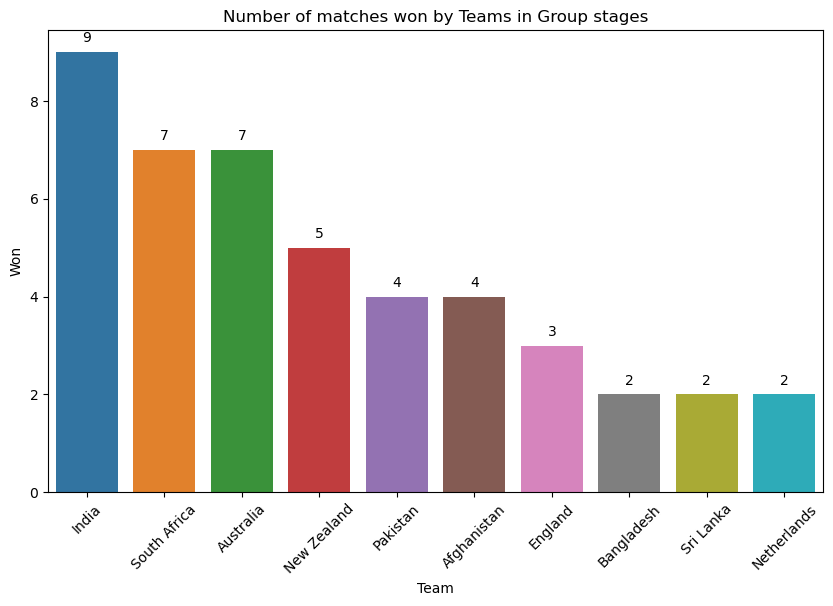

In [12]:
plt.figure(figsize = (10,6))
ax = sns.barplot(x='Team', y='Won', data = table)

# Adding labels on bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 10), textcoords = 'offset points')
plt.xticks(rotation = 45)
plt.title('Number of matches won by Teams in Group stages')
plt.show()

We can observe that India won all of their group stage matches. South Africa and Australia were next with 7 wins each.

**2. Number of matches won by batting first or second in the tournament**

In [13]:
# Function to categorise matches won by batting first or second
def categorise_win(row):

    if pd.notna(row['winner_runs']):
        return 'Batting First'
    elif pd.notna(row['winner_wickets']):
        return 'Batting Second'
    else:
        return 'Unknown'

# Adding a new column to the matches dataframe as win_category
matches['win_category'] = matches.apply(categorise_win, axis = 1)

# Counting the number of matches won by batting first or second
win_count = matches['win_category'].value_counts()

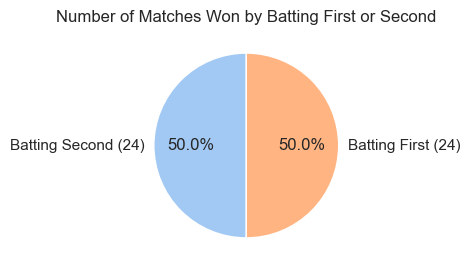

In [14]:
# Create a seaborn pie chart
plt.figure(figsize=(3, 3))
sns.set(style="whitegrid")

# Using seaborn to plot the pie chart with matplotlib
plt.pie(win_count, labels=[f'{label} ({count})' for label, count in zip(win_count.index, win_count)], autopct='%1.1f%%', startangle=90, colors=sns.color_palette("pastel"))
plt.title('Number of Matches Won by Batting First or Second')
plt.show()

Equal number of matches were won batting first and chasing (24).

**3. Next, we will take a look at the toss decisions taken by the team captains in the tournament.**

In [15]:
toss = matches['toss_decision'].value_counts()
label = toss.index
count = toss.values

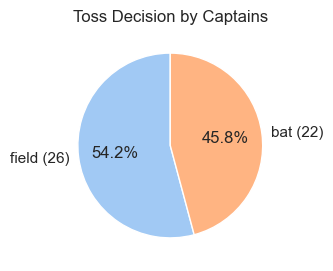

In [16]:
plt.figure(figsize = (3,3))
sns.set(style = 'whitegrid')

# Plotting pie chart
plt.pie(toss, labels=[f'{label} ({count})' for label, count in zip(toss.index, toss.values)], autopct='%1.1f%%', startangle=90, colors=sns.color_palette("pastel"))
plt.title('Toss Decision by Captains')
plt.show()

In 26 matches, teams have preffered to chase and teams have decided to bat first in 22 matches.

**4. Top Run getters of the tournament**

In [17]:
player_runs = deliveries.groupby(['striker']).agg({'runs_off_bat':'sum'}).sort_values(by='runs_off_bat', ascending = False).reset_index()
# player_runs

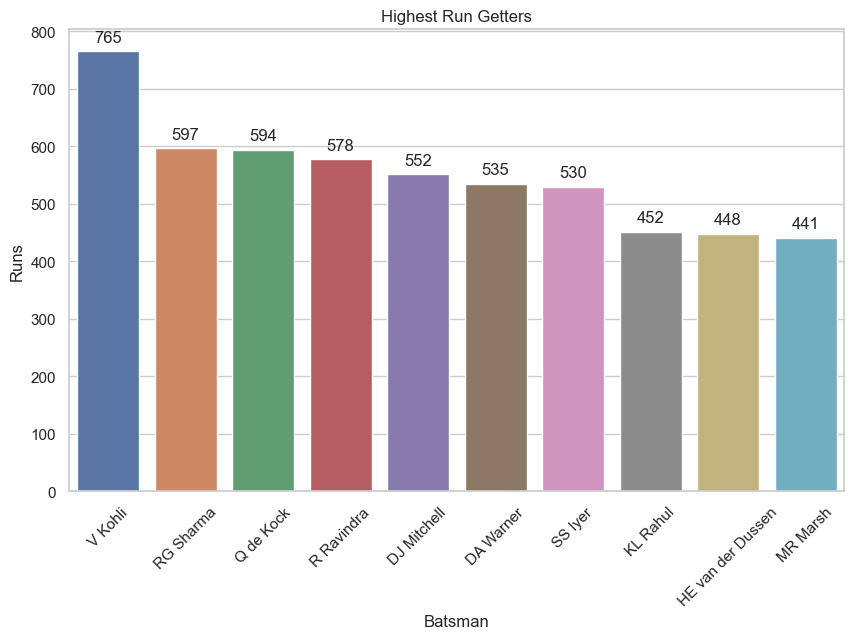

In [18]:
# Plotting the bar chart
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='striker', y='runs_off_bat', data=player_runs[:10]) # Only Top 10

# Adding labels on bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 10), textcoords='offset points')

plt.xticks(rotation=45)
plt.title('Highest Run Getters')
plt.xlabel('Batsman')
plt.ylabel('Runs')
plt.show()

Virat Kohli was the highest run getter with 765 runs in the tournament. The top 10 batsmen had 4 players from the Indian squad showing exceptional performance by the team throughout the tournament.

**5. Number of player of the match awards**

In [19]:
player_of_match = matches['player_of_match'].value_counts().reset_index()
# player_of_match

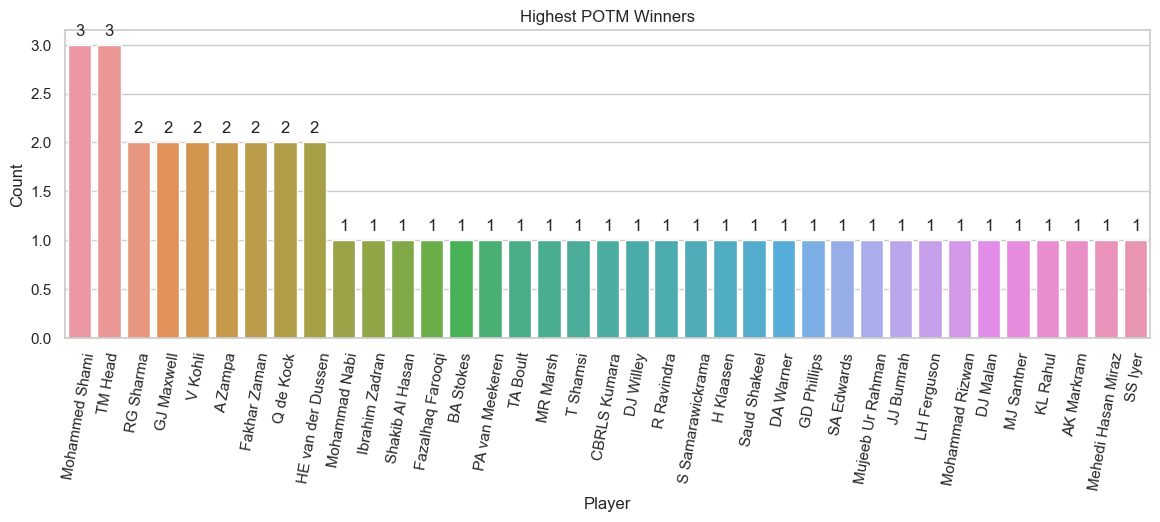

In [20]:
# Plotting the bar chart
plt.figure(figsize=(14, 4))
ax = sns.barplot(x='player_of_match', y='count', data=player_of_match[:])

# Adding labels on bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 10), textcoords='offset points')

plt.xticks(rotation=80)
plt.title('Highest POTM Winners')
plt.xlabel('Player')
plt.ylabel('Count')
plt.show()

Mohammed Shami and Travis Head got 3 POTM awards each.

**6. Next, we will check the bowlers who were the highest wicket-takers in the tournament**

In [21]:
# filetering rows where deliveries are not NaN in deliveries
wickets_df = deliveries[deliveries['wicket_type'].notna()]

# Count of number of wickets taken by each bowler
wickets_by_bowler = wickets_df.groupby('bowler').size().reset_index(name='wickets').sort_values(by='wickets', ascending = False)

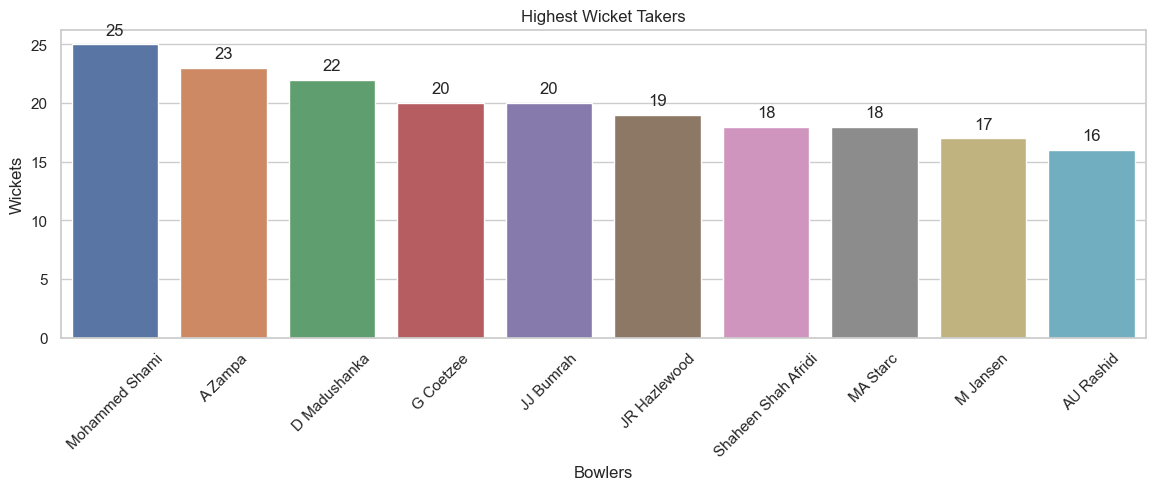

In [22]:
# Plotting the bar chart
plt.figure(figsize=(14, 4))
ax = sns.barplot(x='bowler', y='wickets', data=wickets_by_bowler[:10])

# Adding labels on bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 10), textcoords='offset points')

plt.xticks(rotation=45)
plt.title('Highest Wicket Takers')
plt.xlabel('Bowlers')
plt.ylabel('Wickets')
plt.show()

Mohammed Shami of India was the highest wicket-taker of the tournament with 25 wickets. Adam Zampa of Australia was a close second with 23 wickets.

**7. Runs scored in first and second innings at every stadium in the tournament.**

In [31]:
# grouping deliveries data by venuw and innings to get aggregate runs
runs_by_venueinnings = deliveries.groupby(['venue','innings']).agg({'runs_off_bat':'sum','extras':'sum','wides':'sum','noballs':'sum','byes':'sum','legbyes':'sum','penalty':'sum'})

In [32]:
# getting total runs
runs_by_venueinnings['runs'] = runs_by_venueinnings['runs_off_bat']+runs_by_venueinnings['extras']+runs_by_venueinnings['wides']+runs_by_venueinnings['noballs']+runs_by_venueinnings['byes']+runs_by_venueinnings['legbyes']+runs_by_venueinnings['penalty']
runs_by_venueinnings.reset_index(inplace = True)
# Extracting necessary columns
runs_by_venueinnings = runs_by_venueinnings[['venue','innings','runs']]

runs_by_venueinnings.rename(columns = {'runs':'total_runs'}, inplace = True)

In [37]:
df_melted = pd.melt(runs_by_venueinnings, id_vars = ['venue','innings'], value_vars = ['total_runs'], var_name = 'Innings', value_name = 'Runs')
# Rename innings for better display
df_melted['Innings'] = df_melted['innings'].replace({1: 'First Innings', 2: 'Second Innings'})

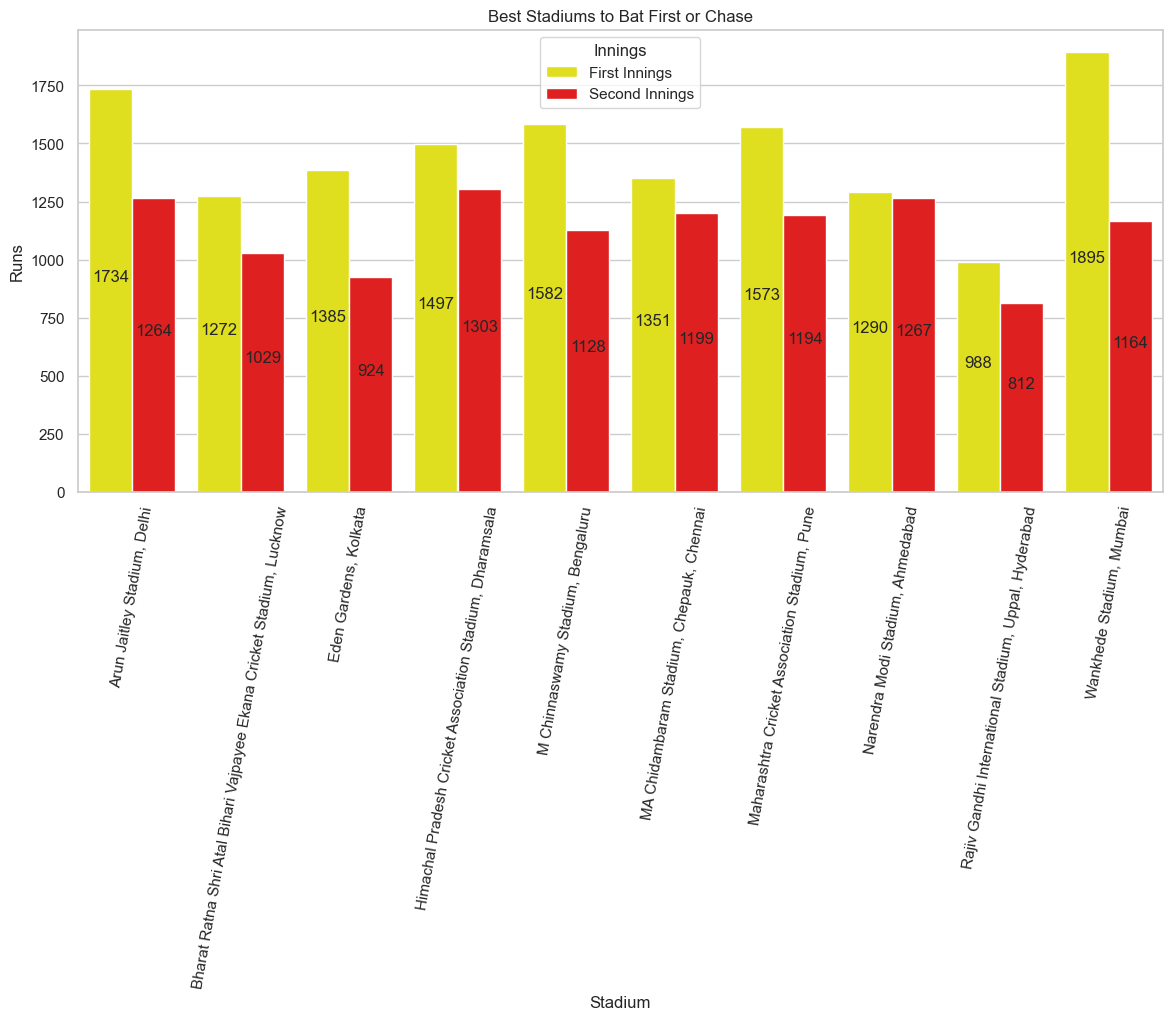

In [48]:
# Plotting using Seaborn
plt.figure(figsize=(14, 6))
ax = sns.barplot(x='venue', y='Runs', hue='Innings', data=df_melted, palette={'First Innings': 'yellow', 'Second Innings': 'red'})

# Adding labels on bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()/2),
                ha='center', va='center',
                xytext=(0, 10), textcoords='offset points')

plt.xticks(rotation=80)
plt.title('Best Stadiums to Bat First or Chase')
plt.xlabel('Stadium')
plt.ylabel('Runs')
plt.legend(title='Innings')
plt.show()

Wankhede Stadiums was the best stadiums for batting first. Narendra Modi Stadium was the best for batting second.

**7. Wickets lost in first and second innings in every stadium**

In [62]:
# Count of number of wickets taken by each bowler
wickets_venue_innings = wickets_df.groupby(['venue','innings']).size().reset_index(name='wickets').sort_values(by='wickets', ascending = False)
wickets_venue_innings['innings'] = wickets_venue_innings['innings'].replace({1: 'First Innings', 2: 'Second Innings'})

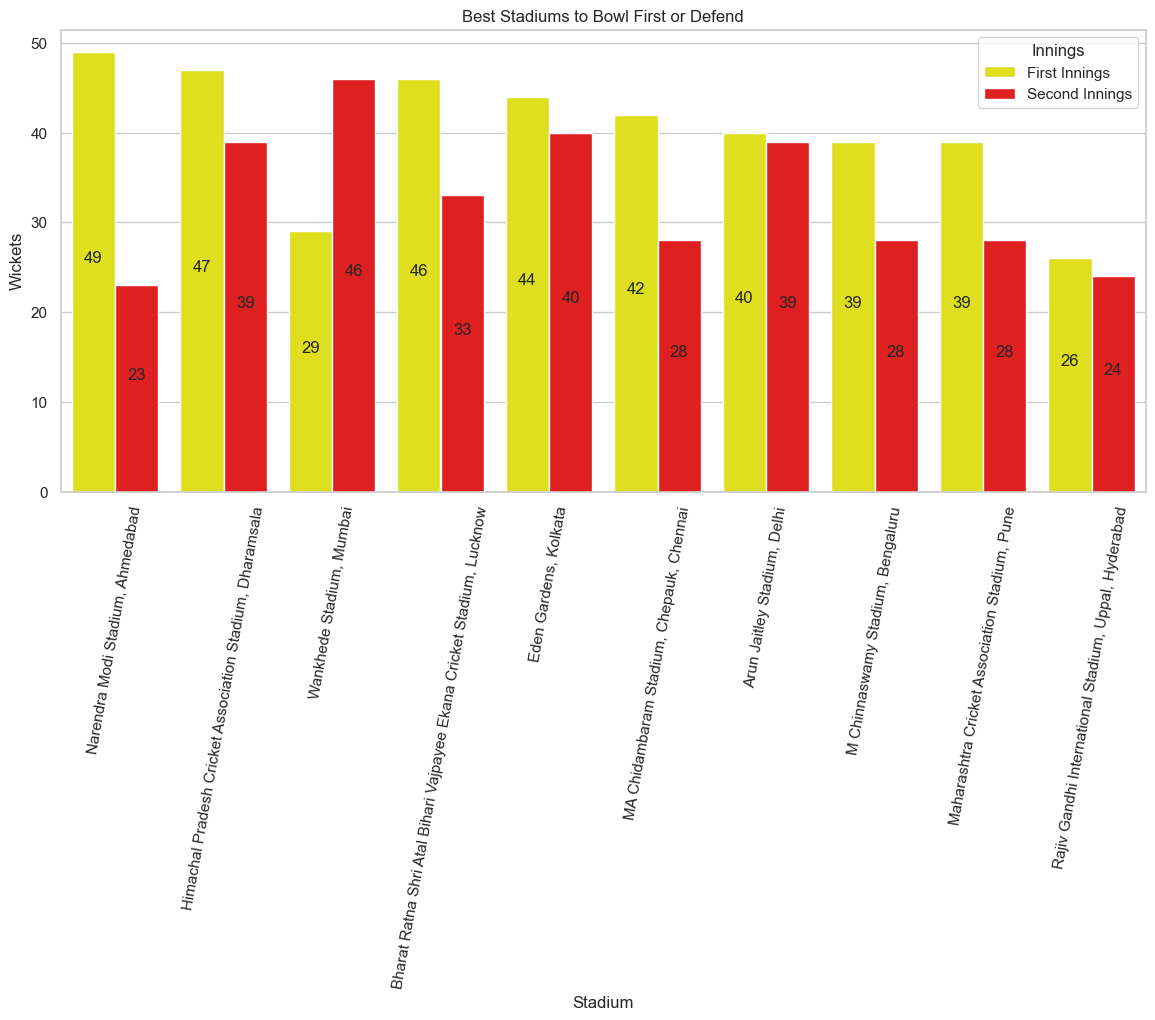

In [64]:
# Plotting using Seaborn
plt.figure(figsize=(14, 6))
ax = sns.barplot(x='venue', y='wickets', hue='innings', data=wickets_venue_innings, palette={'First Innings': 'yellow', 'Second Innings': 'red'})

# Adding labels on bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()/2),
                ha='center', va='center',
                xytext=(0, 10), textcoords='offset points')

plt.xticks(rotation=80)
plt.title('Best Stadiums to Bowl First or Defend')
plt.xlabel('Stadium')
plt.ylabel('Wickets')
plt.legend(title='Innings')
plt.show()

The Narendra Modi stadium was the best stadium to bowl first while the Arun Jaitley stadium is the best stadium to defend.

### Summary



1. India won the most number of matches in the group stage.
2. Equal numbr of matches were won by batting first and while chasing a target.
3. More teams have preferred to chase a target than set the target.
4. Virat Kohli was the highest run getter of the tournament with 765 runs.
5. Mohammed Shami was the highest wicket taker with 25 wickets in the tournament.
6. Mohammed Shami and Travis Head both won 3 Player of The Match awards.
7. Wankhede Stadiums was the best stadiums for batting first while Narendra Modi Stadium was the best for batting second.
8. The Narendra Modi stadium was the best stadium to bowl first while the Arun Jaitley stadium is the best stadium to defend a target.